In [1]:
import os
import math
import fitz
import copy
import json
import tqdm
import yaml
import pickle
import random
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
from utils.render.text import *
from utils.render.title import *

In [3]:
layout_json = json.load(open("random_layout_data.json"))

In [4]:
# 初始化颜色字典
COLOR_DIC = {}
COLOR_DIC['title'] = [0,1,0]
COLOR_DIC['text'] = [0, 1, 1]
COLOR_DIC['figure'] = [139/255,26/255,26/255]

In [5]:
with open("config.yaml") as stream:
    try:
        config = yaml.safe_load(stream)
        print(json.dumps(config, indent=4))
    except yaml.YAMLError as exc:
        print(exc)

{
    "size": {
        "width": [
            1000,
            2500
        ],
        "ratio": [
            0.7,
            1.5
        ],
        "max_height": 3000
    },
    "languages": [
        "Ch",
        "En"
    ],
    "title": {
        "method": "figure",
        "method_text": {
            "Ch_path": "/mnt/hwfile/opendatalab/kanghengrui/data/source/text/Chinese/title",
            "En_path": "/mnt/hwfile/opendatalab/kanghengrui/data/source/text/English/title",
            "fontsize": [
                18,
                36
            ]
        },
        "method_figure": {
            "path": "/mnt/petrelfs/zhaozhiyuan/layout/pretrain_layout/material/title",
            "ratio_step": 0.2,
            "area_step": 500
        }
    },
    "maintext": {
        "fontsize": [
            7,
            15
        ],
        "Ch_path": "/mnt/hwfile/opendatalab/kanghengrui/data/source/text/Chinese/maintext",
        "En_path": "/mnt/hwfile/opendatalab/kanghengrui/data/

### text

In [197]:
LANGUAGE = random.choice(config["languages"])
MAINTEXT_PATH = config["maintext"][f"{LANGUAGE}_path"]
MAINTEXT_FONTSIZE_LOW, MAINTEXT_FONTSIZE_HIGH = config["maintext"]["fontsize"]
MAIN_TEXT_FONTSIZE = random.uniform(MAINTEXT_FONTSIZE_LOW,MAINTEXT_FONTSIZE_HIGH)
FIND_THR = config["others"]["find_thr"]
LINE_MARGIN = config["others"]["find_thr"]
ERASER_RATIO = config["others"]["line_margin"]
BOUND_VISUALIZE = config["others"]["visualize"]
page_type = random.choice(config["others"]["page_type"])

In [198]:
print(LANGUAGE, MAIN_TEXT_FONTSIZE, page_type)

En 8.949401171673555 paper


In [199]:
W = random.randint(config['size']['width'][0], config['size']['width'][1])
ratio = random.uniform(config['size']['ratio'][0], config['size']['ratio'][1])
H = min(config['size']['max_height'], int(W*ratio))
print(W, H)

1311 1544


In [200]:
layout = copy.deepcopy(random.choice([l for l in layout_json if 0 in l["categories"]]))
bbox = [layout["boxes"][i] for i in range(len(layout["boxes"])) if layout["categories"][i]==0]
bbox = random.choice(bbox)
bbox[0], bbox[2] = bbox[0]*W, bbox[2]*W
bbox[1], bbox[3] = bbox[1]*H, bbox[3]*H
print(bbox)

[686.3956393988576, 1331.741474696609, 786.8865131268434, 1491.1413149726295]


In [201]:
doc = fitz.open()
page = doc.new_page(width=W, height=H)

In [202]:
rect = fitz.Rect([bbox[i] for i in range(4)])

In [203]:
TEXT, TOTAL_LIST= random_txt_load(text_dir=MAINTEXT_PATH,type='maintext')

In [204]:
MAINTEXT_FONT = specify_font(language=LANGUAGE,text_type='maintext')

In [205]:
start, end = 0, 1
put_para_text(
    page=page,
    start=start,
    end=end,
    text=TEXT,
    rect=rect, 
    fontname=MAINTEXT_FONT,
    fontsize=random.uniform(MAINTEXT_FONTSIZE_LOW,MAINTEXT_FONTSIZE_HIGH),
    align=3,
    total_list=TOTAL_LIST,
    eraser_ratio=ERASER_RATIO,
    main_text_fontsize=MAIN_TEXT_FONTSIZE,
    find_thr=FIND_THR,
    line_margin=LINE_MARGIN,
    bound_visualize=BOUND_VISUALIZE,
    type=page_type
)

(0, 145)

In [206]:
pix = page.get_pixmap()
pix.save('test.jpg')

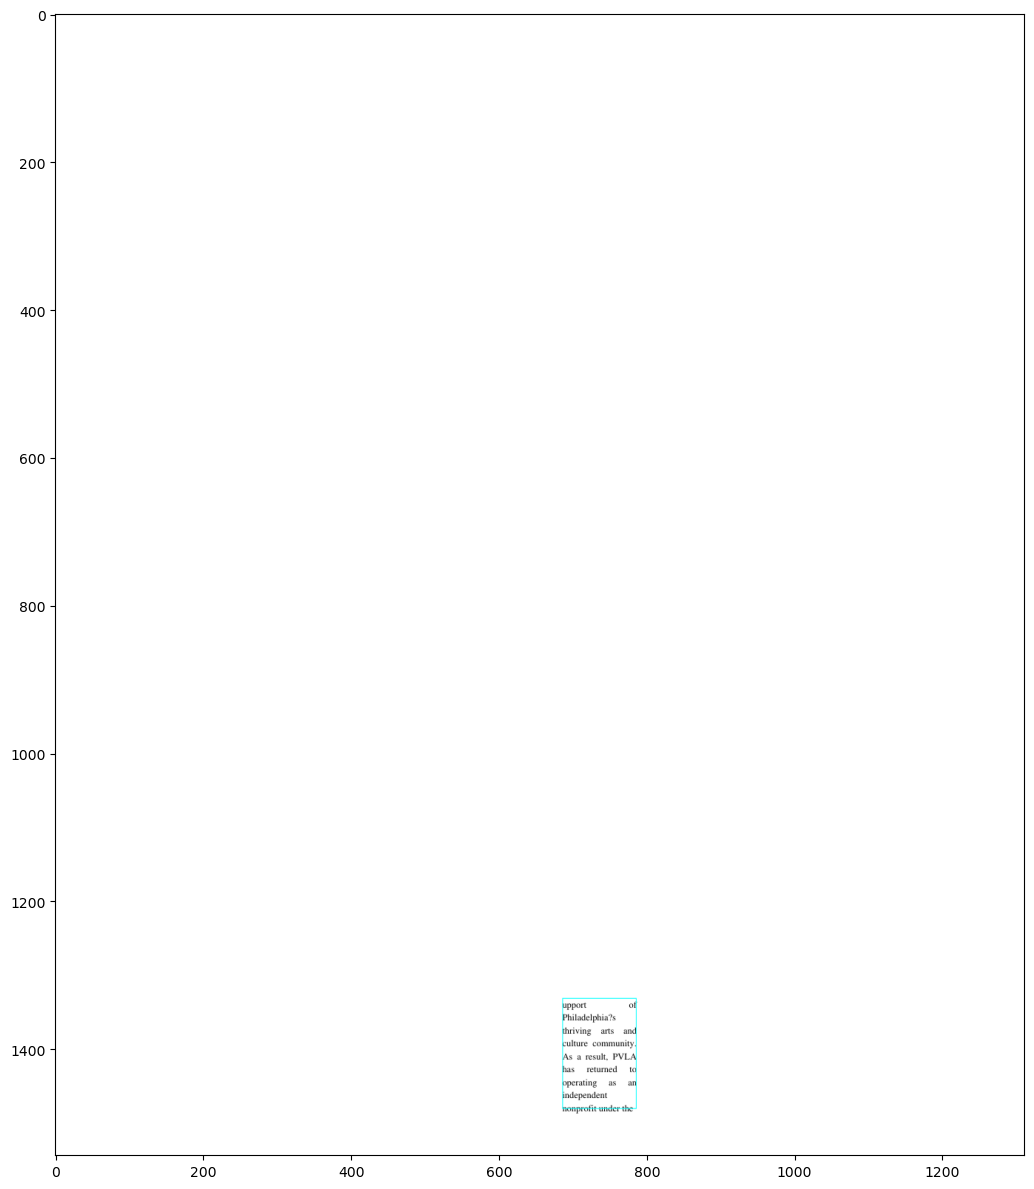

In [207]:
image = Image.open('test.jpg')
plt.figure(figsize=[12,12])
plt.imshow(image)
plt.tight_layout()

### title (text)

In [55]:
LANGUAGE = random.choice(config["languages"])
TITLE_PATH = config['title']['method_text'][f'{LANGUAGE}_path']
TITLE_FONTSIZE_LOW, TITLE_FONTSIZE_HIGH = config['title']['method_text']['fontsize']
FIND_THR = config["others"]["find_thr"]
BOUND_VISUALIZE = config["others"]["visualize"]

In [56]:
W = random.randint(config['size']['width'][0], config['size']['width'][1])
ratio = random.uniform(config['size']['ratio'][0], config['size']['ratio'][1])
H = min(config['size']['max_height'], int(W*ratio))
print(W, H)

1564 1114


In [57]:
layout = copy.deepcopy(random.choice([l for l in layout_json if 1 in l["categories"]]))
bbox = [layout["boxes"][i] for i in range(len(layout["boxes"])) if layout["categories"][i]==1]
bbox = random.choice(bbox)
bbox[0], bbox[2] = bbox[0]*W, bbox[2]*W
bbox[1], bbox[3] = bbox[1]*H, bbox[3]*H
print(bbox)

[441.3540004969885, 839.6427915525892, 1384.984779650001, 927.6513068626521]


In [58]:
doc = fitz.open()
page = doc.new_page(width=W, height=H)

In [59]:
rect = fitz.Rect([bbox[i] for i in range(4)])

In [60]:
title = random_txt_load(text_dir=TITLE_PATH,type='title')

In [61]:
title_font = specify_font(language=LANGUAGE,text_type='title')

In [62]:
final_rect = put_title(
    text=title,
    page=page,
    fontname=title_font,
    title_fontsize_low=TITLE_FONTSIZE_LOW,
    title_fontsize_high=TITLE_FONTSIZE_HIGH,
    find_thr=FIND_THR,
    rect=rect,
    align=1)
rect_visualize(page=page,type='text',rect=final_rect,color_dic=COLOR_DIC,bound_visualize=BOUND_VISUALIZE)

In [63]:
pix = page.get_pixmap()
pix.save('test.jpg')

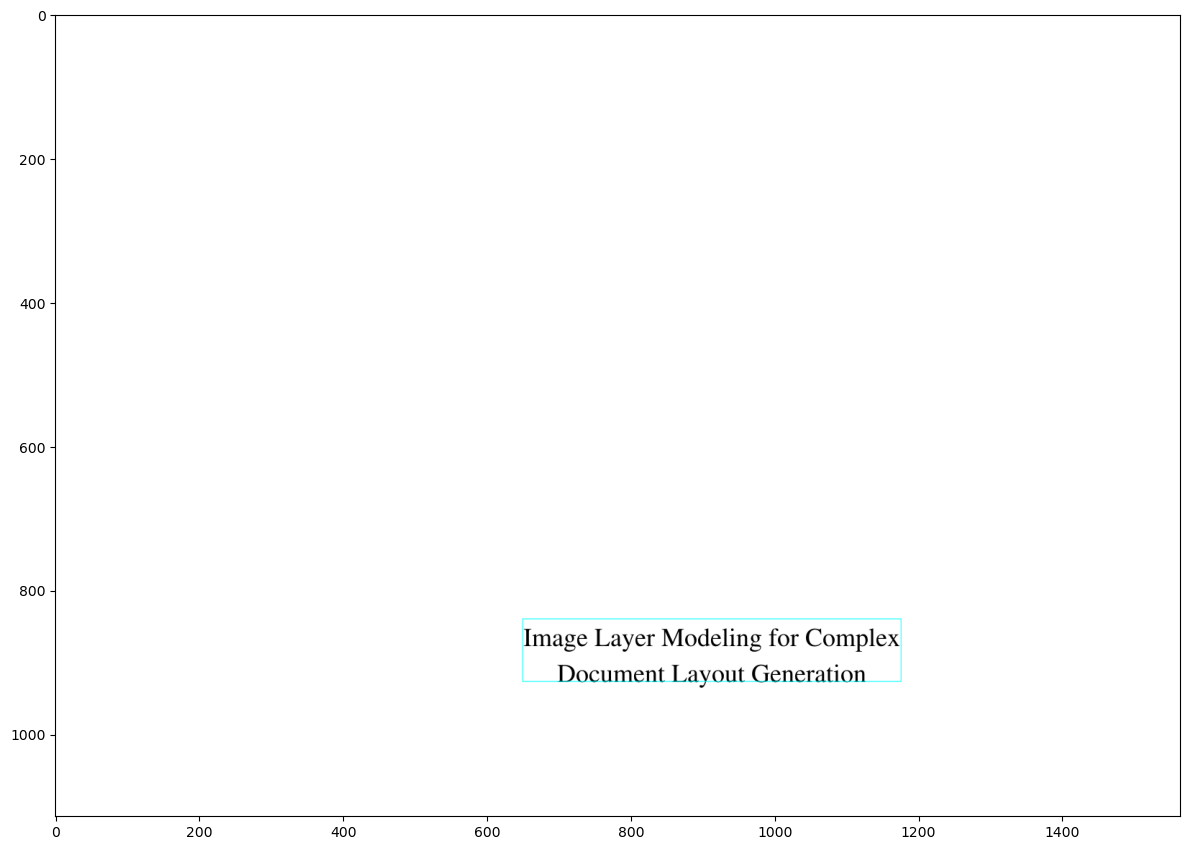

In [64]:
image = Image.open('test.jpg')
plt.figure(figsize=[12,12])
plt.imshow(image)
plt.tight_layout()

### image

In [65]:
def select_image(rect, search_dict, ratio_step, area_step):
    ratio = (rect[2]-rect[0])/(rect[3]-rect[1])
    area = (rect[2]-rect[0])*(rect[3]-rect[1])
    ratio_range = [ratio for ratio in search_dict.keys() 
        if not all([len(search_dict[ratio][area])==0 for area in search_dict[ratio].keys()])]
    min_ratio = min(ratio_range, key=lambda x:abs(x-ratio))
    area_range = [area for area in list(search_dict[min_ratio].keys()) if len(search_dict[min_ratio][area])!=0]
    min_area = min(area_range, key=lambda x:abs(x-area))
    # print(ratio, min_ratio, ratio_step)
    # assert abs(ratio - min_ratio) < ratio_step*3 and abs(area - min_area) < area_step*8
    # assert abs(ratio - min_ratio) < ratio_step*3
    return random.choice(search_dict[min_ratio][min_area])

In [80]:
IMAGE_PATH = config["image"]["path"]
IMAGE_RATIO_STEP = config["image"]["ratio_step"]
IMAGE_AREA_STEP = config["image"]["area_step"]
BOUND_VISUALIZE = config["others"]["visualize"]

In [78]:
image_search_dict = pickle.load(open("image_material_map.pt", "rb"))

In [107]:
W = random.randint(config['size']['width'][0], config['size']['width'][1])
ratio = random.uniform(config['size']['ratio'][0], config['size']['ratio'][1])
H = min(config['size']['max_height'], int(W*ratio))
print(W, H)

2440 3000


In [108]:
layout = copy.deepcopy(random.choice([l for l in layout_json if 4 in l["categories"]]))
bbox = [layout["boxes"][i] for i in range(len(layout["boxes"])) if layout["categories"][i]==4]
bbox = random.choice(bbox)
bbox[0], bbox[2] = bbox[0]*W, bbox[2]*W
bbox[1], bbox[3] = bbox[1]*H, bbox[3]*H
print(bbox)

[31.66106490092173, 936.7578581591838, 786.8056204793224, 1498.4243814700178]


In [109]:
doc = fitz.open()
page = doc.new_page(width=W, height=H)

In [110]:
rect = fitz.Rect([bbox[i] for i in range(4)])

In [111]:
img_path = select_image(rect, image_search_dict, IMAGE_RATIO_STEP, IMAGE_AREA_STEP)
if img_path is not None:
    img_path = os.path.join(IMAGE_PATH, img_path)
    print(img_path)

/mnt/hwfile/opendatalab/zhaozhiyuan/cc3m/44c789708343d0b7ac5b129c73b1da76.jpg


In [112]:
page.insert_image(rect,filename=img_path, keep_proportion=False)
rect_visualize(page=page,type='text',rect=rect,color_dic=COLOR_DIC,bound_visualize=BOUND_VISUALIZE)

In [113]:
pix = page.get_pixmap()
pix.save('test.jpg')

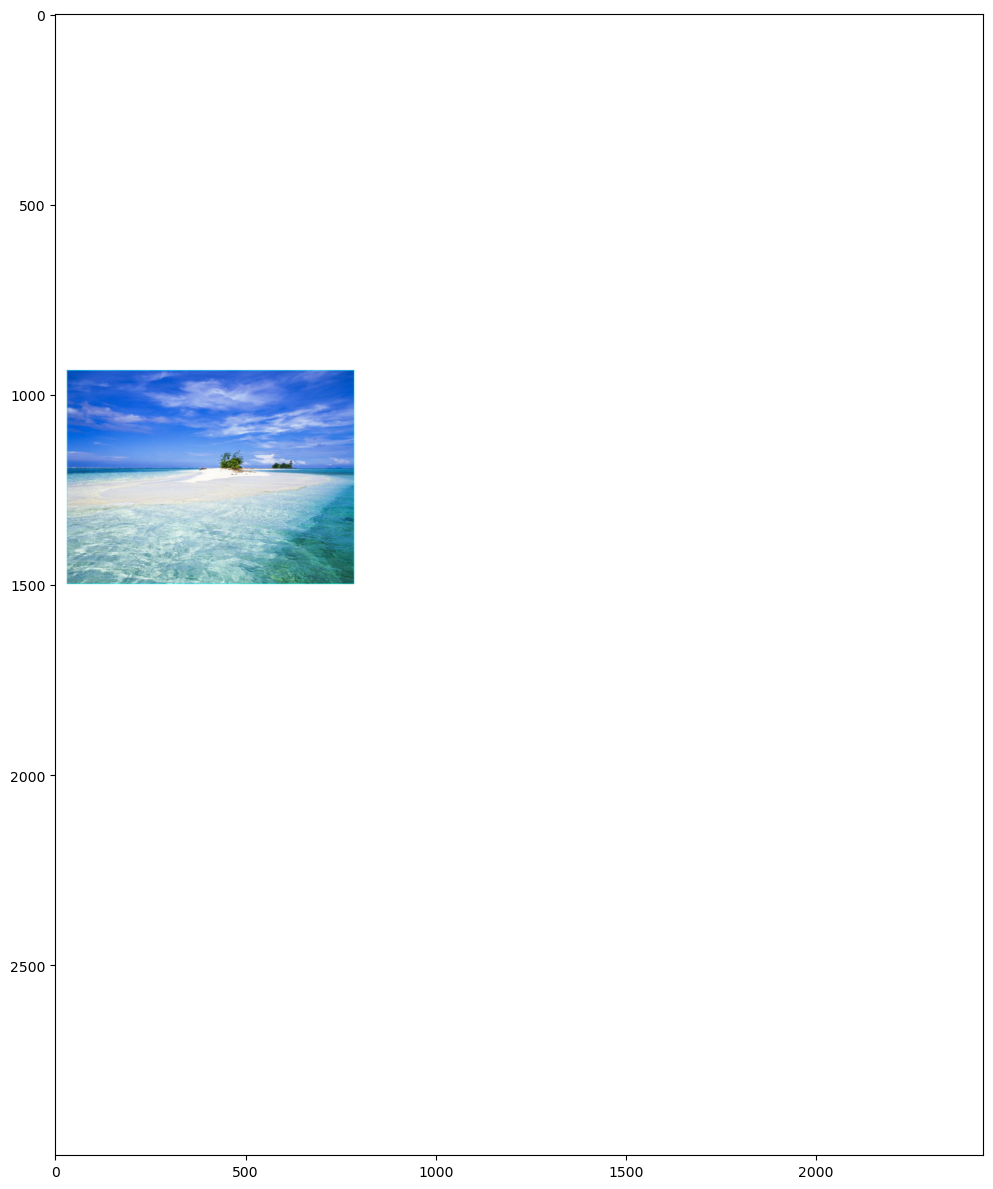

In [114]:
image = Image.open('test.jpg')
plt.figure(figsize=[12,12])
plt.imshow(image)
plt.tight_layout()

### table

In [115]:
def select_table(rect, search_dict, ratio_step, area_step):
    ratio = (rect[2]-rect[0])/(rect[3]-rect[1])
    area = (rect[2]-rect[0])*(rect[3]-rect[1])
    ratio_range = [ratio for ratio in search_dict.keys() 
        if not all([len(search_dict[ratio][area])==0 for area in search_dict[ratio].keys()])]
    min_ratio = min(ratio_range, key=lambda x:abs(x-ratio))
    area_range = [area for area in list(search_dict[min_ratio].keys()) if len(search_dict[min_ratio][area])!=0]
    min_area = min(area_range, key=lambda x:abs(x-area))
    # assert abs(ratio - min_ratio) < ratio_step*3 and abs(area - min_area) < area_step*8
    assert abs(ratio - min_ratio) < ratio_step*3
    return random.choice(search_dict[min_ratio][min_area])

In [117]:
table_search_dict = pickle.load(open("table_material_map.pt", "rb"))

In [123]:
TABLE_RATIO_STEP = config['table']['ratio_step']
TABLE_AREA_STEP = config['table']['area_step']
TABLE_PATH = config['table']['path']

In [131]:
W = random.randint(config['size']['width'][0], config['size']['width'][1])
ratio = random.uniform(config['size']['ratio'][0], config['size']['ratio'][1])
H = min(config['size']['max_height'], int(W*ratio))
print(W, H)

1376 1268


In [132]:
doc = fitz.open()
page = doc.new_page(width=W, height=H)

In [133]:
rect = fitz.Rect([bbox[i] for i in range(4)])

In [134]:
table_path = select_table(rect, table_search_dict, TABLE_RATIO_STEP, TABLE_AREA_STEP)
if table_path is not None:
    table_path = os.path.join(TABLE_PATH, table_path)
    print(table_path)

/mnt/hwfile/opendatalab/kanghengrui/icdar_table/1c8c786e697d73021eaa53b2981f842209367d6595154fc3c3110bd98e9f27e0.png


In [135]:
page.insert_image(rect,filename=table_path, keep_proportion=False)
rect_visualize(page=page,type='text',rect=rect,color_dic=COLOR_DIC,bound_visualize=BOUND_VISUALIZE)

In [136]:
pix = page.get_pixmap()
pix.save('test.jpg')

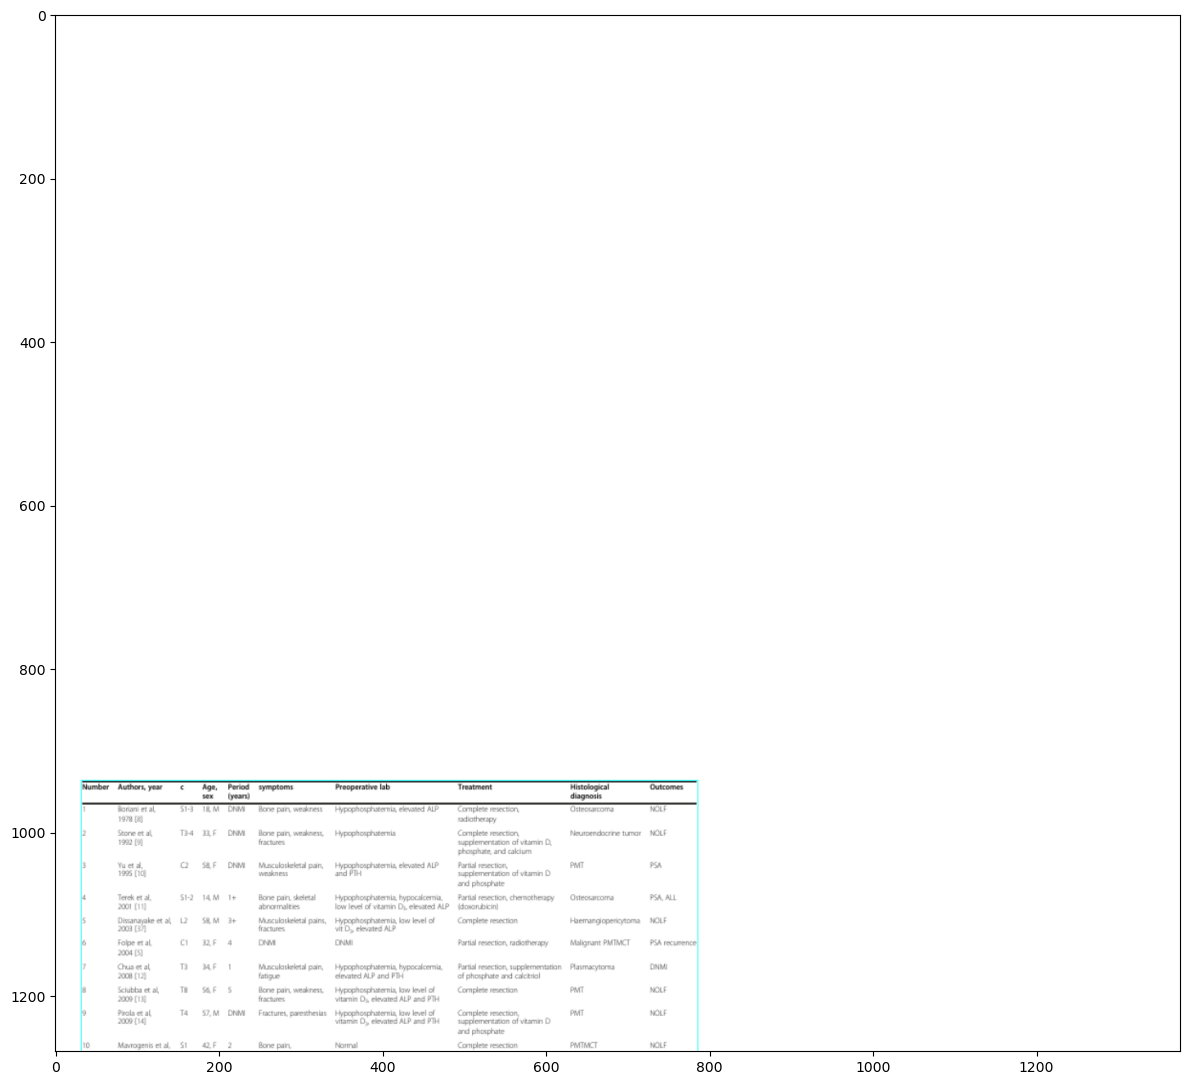

In [137]:
image = Image.open('test.jpg')
plt.figure(figsize=[12,12])
plt.imshow(image)
plt.tight_layout()

### title (image)

In [138]:
def select_title(rect, search_dict, ratio_step, area_step):
    ratio = (rect[2]-rect[0])/(rect[3]-rect[1])
    area = (rect[2]-rect[0])*(rect[3]-rect[1])
    ratio_range = [ratio for ratio in search_dict.keys() 
        if not all([len(search_dict[ratio][area])==0 for area in search_dict[ratio].keys()])]
    min_ratio = min(ratio_range, key=lambda x:abs(x-ratio))
    area_range = [area for area in list(search_dict[min_ratio].keys()) if len(search_dict[min_ratio][area])!=0]
    min_area = min(area_range, key=lambda x:abs(x-area))
    # print(ratio, min_ratio, ratio_step)
    # print(area, min_area, area_step)
    # assert abs(ratio - min_ratio) < ratio_step*3 and abs(area - min_area) < area_step*100
    assert abs(ratio - min_ratio) < ratio_step*3
    return random.choice(search_dict[min_ratio][min_area])

In [146]:
title_search_dict = pickle.load(open("title_material_map.pt", "rb"))

In [140]:
TITLE_PATH = config['title']['method_figure']['path']
TITLE_RATIO_STEP = config['title']['method_figure']['ratio_step']
TITLE_AREA_STEP = config['title']['method_figure']['area_step']

In [141]:
W = random.randint(config['size']['width'][0], config['size']['width'][1])
ratio = random.uniform(config['size']['ratio'][0], config['size']['ratio'][1])
H = min(config['size']['max_height'], int(W*ratio))
print(W, H)

2233 2326


In [142]:
layout = copy.deepcopy(random.choice([l for l in layout_json if 1 in l["categories"]]))
bbox = [layout["boxes"][i] for i in range(len(layout["boxes"])) if layout["categories"][i]==1]
bbox = random.choice(bbox)
bbox[0], bbox[2] = bbox[0]*W, bbox[2]*W
bbox[1], bbox[3] = bbox[1]*H, bbox[3]*H
print(bbox)

[1885.3348091175628, 567.6134087889852, 2055.703679023928, 677.3153213211261]


In [143]:
doc = fitz.open()
page = doc.new_page(width=W, height=H)

In [144]:
rect = fitz.Rect([bbox[i] for i in range(4)])

In [147]:
title_path = select_title(rect, title_search_dict, TITLE_RATIO_STEP, TITLE_AREA_STEP)
if title_path is not None:
    title_path = os.path.join(TITLE_PATH, title_path)
    print(title_path)

/mnt/petrelfs/zhaozhiyuan/layout/pretrain_layout/material/title/306134_564870.jpg


In [148]:
page.insert_image(rect,filename=title_path, keep_proportion=False)
rect_visualize(page=page,type='text',rect=rect,color_dic=COLOR_DIC,bound_visualize=BOUND_VISUALIZE)

In [149]:
pix = page.get_pixmap()
pix.save('test.jpg')

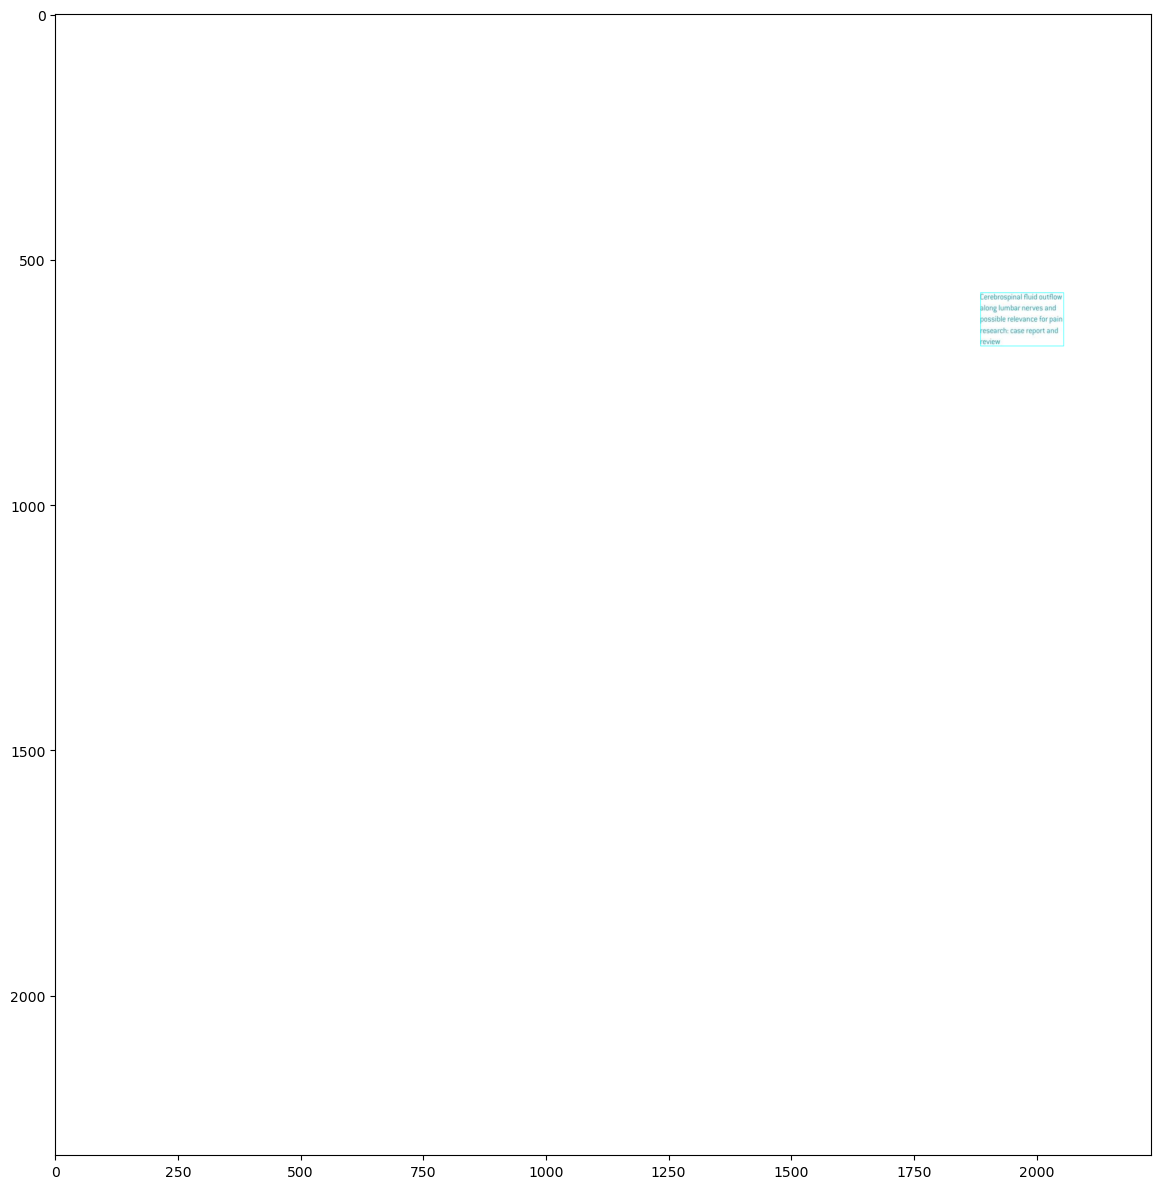

In [150]:
image = Image.open('test.jpg')
plt.figure(figsize=[12,12])
plt.imshow(image)
plt.tight_layout()